!/usr/bin/fenv python3.7<br>
-*- coding: utf-8 -*-

In [11]:
from urllib               import request
from collections          import Counter
from wordcloud            import WordCloud
from nltk.corpus          import stopwords

import numpy              as np
import matplotlib.pyplot  as plt

import random
import nltk
import requests

__author__ = "Christoph Hartleb"<br>
__copyright__ = "Copyright 2019"<br>
__credits__ = ["Christoph Hartleb"]<br>
__version__ = "1.0.1"<br>
__email__ = "14hartle@edu.uni-graz.at"<br>
__status__ = "Production"

In [12]:
URL = 'http://www.gutenberg.org/cache/epub/24681/pg24681.txt'

RESPONSE = request.urlopen(URL)
RAW = RESPONSE.read().decode('utf8')

for char in '-.,\n;:?=)(/&%$§"!)12345678':
    RAW = RAW.replace(char, ' ')

data = RAW
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

# Generate a Wordcloud

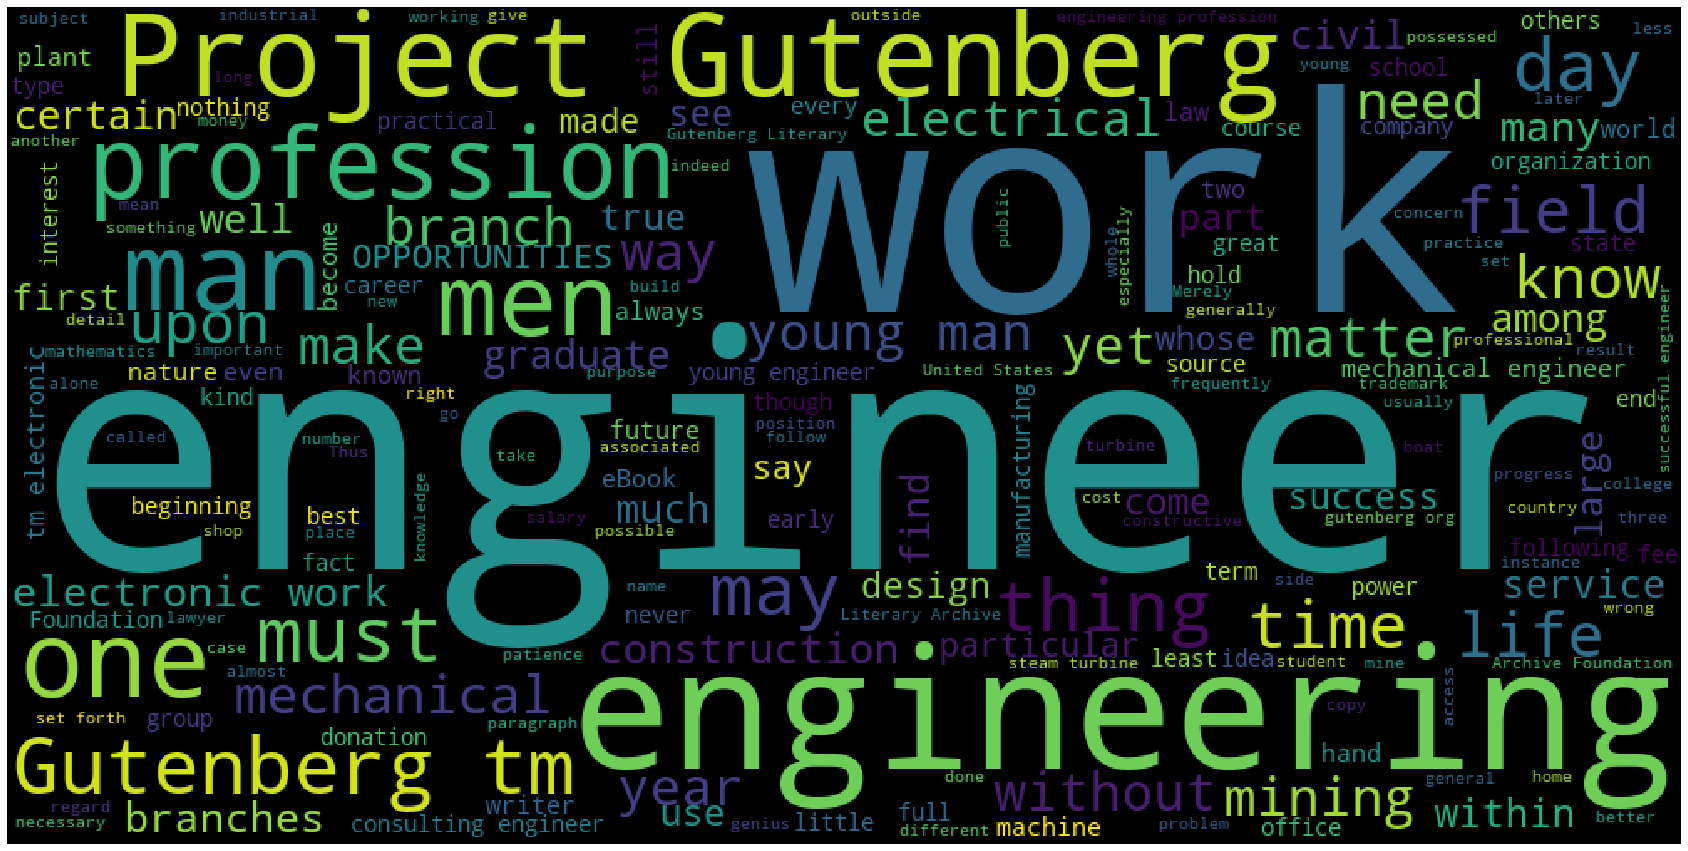

In [13]:
UNIQUE_STRING = (" ").join(wordsFiltered)
WORDCLOUD = WordCloud(width=1000, height=500).generate(UNIQUE_STRING)
plt.figure(figsize=(30, 16))
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.show()

# Histogram

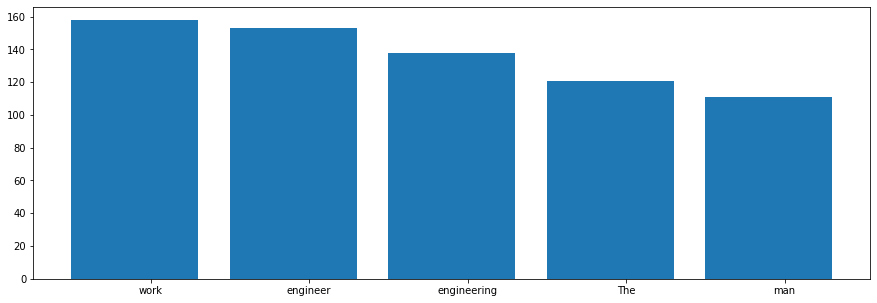

In [14]:
vocab_labels, vocab_values = zip(*Counter(wordsFiltered).items())  
                                                                                                                                                           
sorted_values = sorted(vocab_values)[::-1]
sorted_labels = [x for (y,x) in sorted(zip(vocab_values,vocab_labels))][::-1]  
indexes = np.arange(len(sorted_labels[:5]))                                    
width = 1                                                                                                                                                

plt.figure(figsize=(15, 5))
plt.bar(indexes, sorted_values[:5])
plt.xticks(indexes + width * 0.1, sorted_labels[:5])                                                                                    
plt.show()

# Wordoccureny in sentences

In [15]:
text = nltk.Text(wordsFiltered)
text_choosen = text.concordance(random.choice(text))

Displaying 25 of 162 matches:
ect Gutenberg eBook Opportunities Engineering Charles M Horton This eBook use a
gutenberg org Title Opportunities Engineering Author Charles M Horton Release D
ttp www pgdp net OPPORTUNITIES IN ENGINEERING * * * * * * OPPORTUNITY BOOKS OPP
PPORTUNITY BOOKS OPPORTUNITIES IN ENGINEERING BY CHARLES M HORTON OPPORTUNITIES
SHED * * * * * * OPPORTUNITIES IN ENGINEERING CHARLES M HORTON Harper Brothers 
 New York London OPPORTUNITIES IN ENGINEERING Copyright 9 0 Harper Brothers Pri
ed April 9 0 CONTENTS CHAP PAGE I ENGINEERING AND THE ENGINEER II ENGINEERING O
I ENGINEERING AND THE ENGINEER II ENGINEERING OPPORTUNITIES 9 III THE ENGINEERI
GINEERING OPPORTUNITIES 9 III THE ENGINEERING TYPE IV THE FOUR MAJOR BRANCHES V
 THE ENGINEER XI WHAT CONSTITUTES ENGINEERING SUCCESS XII THE PERSONAL SIDE OPP
HE PERSONAL SIDE OPPORTUNITIES IN ENGINEERING I ENGINEERING AND THE ENGINEER Se
DE OPPORTUNITIES IN ENGINEERING I ENGINEERING AND THE ENGINEER Several years ag
 regular a

# Lexical dispersion plot

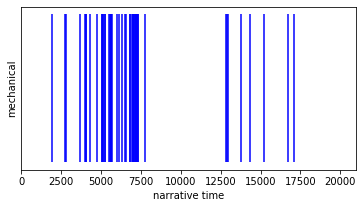

In [29]:
WORD = (random.choice(wordsFiltered))

x=list()
for i in range(0,len(words)):
    if words[i] == WORD:
        x.append(i)

fig, ax = plt.subplots()
ax.vlines(x, 0, 1, edgecolor="blue")
ax.set_xlim([0, len(words)])
ax.set_xlabel('narrative time')
ax.set_xticks([0],minor=True)
ax.set_ylabel(WORD)
ax.set_yticks([])
fig.set_figheight(3)

# Searching for word occurencies

In [21]:
wordsFiltered.sort()

spec_letter = input("Your letter/sequence is: ")

print('\n')

for word in wordsFiltered:
    if spec_letter in word:
        print (word)

Your letter/sequence is: er


America
America
America
American
American
American
Bergquist
Brothers
Brothers
Certain
Certainly
Certainly
Either
Emerson
Emersonian
Engineering
Engineering
Engineering
Engineering
Engineering
Engineering
Engineering
Engineering
Engineering
Engineering
Engineering
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Engineers
Entering
Everybody
General
General
General
Germany
Germany
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenberg
Gutenb

number
number
numbers
numerous
numerous
observation
observed
observes
offer
offer
offered
offered
offered
offered
offered
offered
offered
offering
offering
offers
offers
offers
offers
offers
older
older
older
operated
operated
operated
operated
operates
operating
operating
operating
operating
operating
operating
operating
operating
operation
operation
operation
operations
operations
operations
operations
order
order
order
order
order
order
order
others
others
others
others
others
others
others
others
others
others
others
others
others
others
others
others
otherwise
otherwise
otherwise
otherwise
otherwise
otherwise
otherwise
otherwise
outer
overalls
overalls
overalls
overalls
overalls
overalls
overalls
overburdened
overcame
overhauling
overlapping
overlapping
overlaps
overnight
overseeing
owner
owner
owner
owner
owner
paper
paper
paper
paper
paper
paper
paper
paper
paper
papering
paperwork
pattern
pattern
perceive
perceive
perceives
percentage
perfect
perfected
perforce
perforce
perforc

# Close file

In [22]:
RESPONSE.close()